### LGM-VIP Data Science Internship Programme

### Pratima Yadav

### INTERMEDIATE TASK-02

### Name-Exploratory Data Analysis on Dataset - Terrorism 

### Language-Python

### Software-Jupyter Notebook

### Dataset-https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

### Importing the libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

### Loading the data

In [11]:
data = pd.read_csv("globalterrorism.csv",encoding='latin-1')

c:\users\91932\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
data.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [14]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data.shape

(181691, 135)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


### Data Cleaning

In [17]:
data.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [18]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [19]:
data.keys()

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [21]:
count_non_miss = data.count().head()

In [22]:
count_non_miss

eventid       181691
iyear         181691
imonth        181691
iday          181691
approxdate      9239
dtype: int64

In [26]:
mean_missing_percent=data.isnull().mean()*100
total_missing=data.isnull().sum().sort_values(ascending=False)

missing_data = pd.concat([total_missing,mean_missing_percent],axis=1,keys=['Total','%'])

In [25]:
missing_data

,Total,%
gsubname3,181671,99.988992
weapsubtype4_txt,181621,99.961473
weapsubtype4,181621,99.961473
weaptype4,181618,99.959822
weaptype4_txt,181618,99.959822
...,...,...
suicide,0,0.000000
success,0,0.000000
crit3,0,0.000000
property,0,0.000000


<AxesSubplot:>

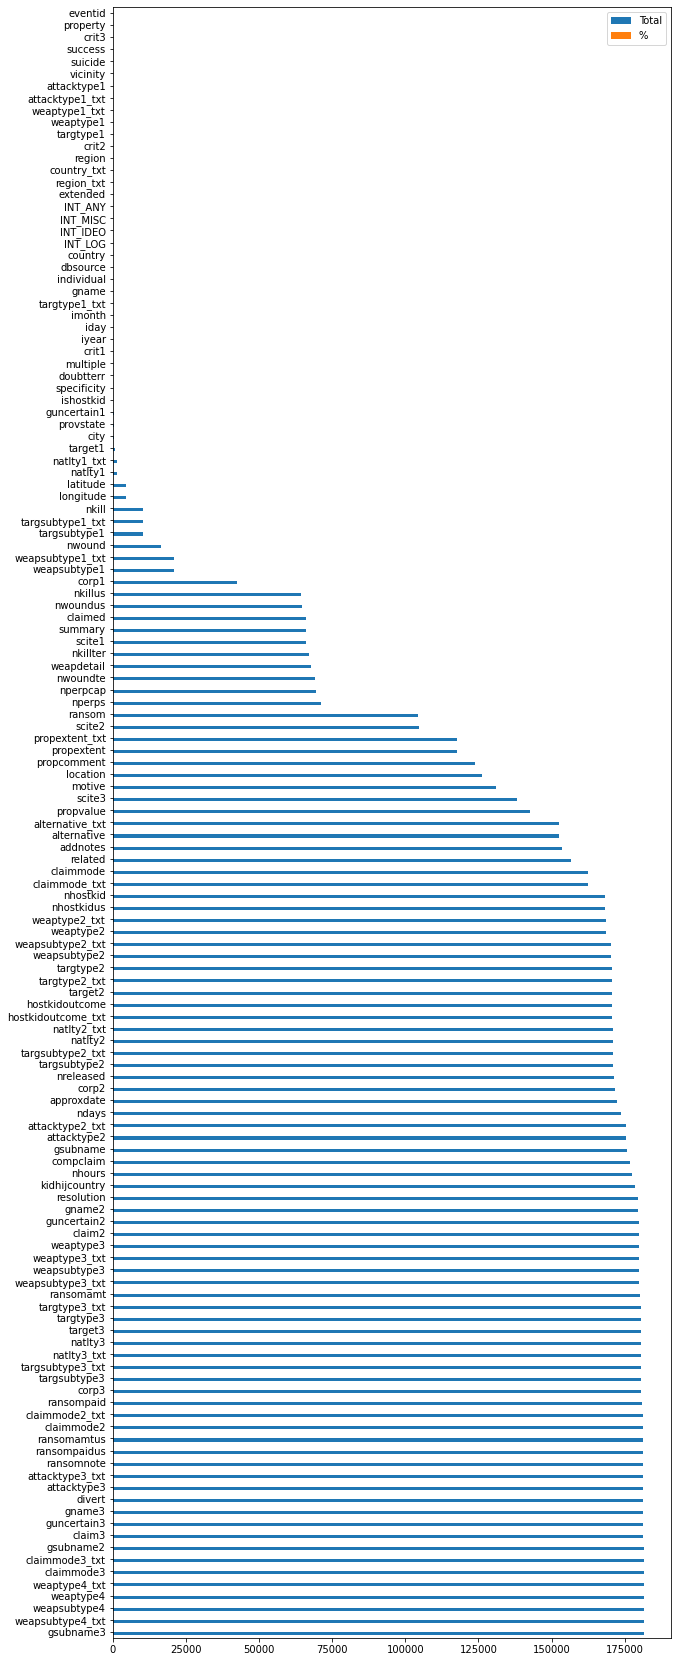

In [27]:
missing_data.plot(kind="barh",figsize=(10,30))


<AxesSubplot:>

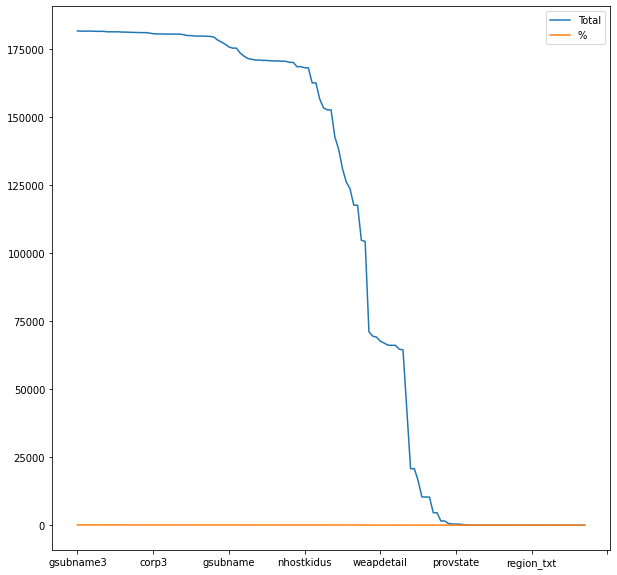

In [29]:
missing_data.plot(figsize=(10,10))

### Extracting the Columns

In [31]:
dataset = pd.DataFrame(data,columns=["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt","provstate",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"])

In [32]:
dataset.head(5)

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,NaN,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,NaN,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,NaN,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,NaN,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,NaN,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate


In [33]:
dataset.shape

(181691, 15)

In [34]:
mean_missing_percent1=dataset.isnull().mean()*100
total_missing1= dataset.isnull().sum().sort_values(ascending=False)

missing_data1 = pd.concat([total_missing1,mean_missing_percent1],axis=1,keys=['Total','%'])
missing_data1

,Total,%
location,126196,69.456385
targsubtype1_txt,10373,5.709144
city,434,0.238867
provstate,421,0.231712
eventid,0,0.000000
iyear,0,0.000000
imonth,0,0.000000
iday,0,0.000000
country,0,0.000000
country_txt,0,0.000000


### Fill missing values

In [35]:
dataset[["provstate"]] = dataset[["provstate"]].fillna(value="0")

In [36]:
dataset[["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"]] = dataset[["eventid","iyear","imonth","iday","country",
                                   "country_txt","region","region_txt",
                                  "city","location","success","attacktype1_txt",
                                   "targtype1_txt","targsubtype1_txt"]] .fillna(value=0)
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,0,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate


In [37]:
dataset.isnull()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
181689,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
dataset.isnull().sum()

eventid             0
iyear               0
imonth              0
iday                0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
city                0
location            0
success             0
attacktype1_txt     0
targtype1_txt       0
targsubtype1_txt    0
dtype: int64

### Analyzing the assasination attack

In [40]:
assassination = data[data['attacktype1_txt'].str.contains("Assassination",na=False)]
assassination.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
6,197001020001,1970,1,2,NaN,0,NaN,218,Uruguay,3,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
25,197001200001,1970,1,20,NaN,0,NaN,83,Guatemala,2,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
111,197003050003,1970,3,5,NaN,0,NaN,217,United States,1,...,Conflicting reports attribute the incident to ...,Committee on the Judiciary United States Sena...,"William Sater, ""Puerto Rican Terrorists: A Pos...","""Toward People's War for Independence and Soci...",Hewitt Project,0,1,0,1,NaN


In [41]:
assassination.shape

(19312, 135)

## Analyzing the places

In [42]:
assassination.groupby("country_txt").size().sort_values(ascending=False)

country_txt
United Kingdom       1651
Pakistan             1406
Colombia             1343
Iraq                 1287
India                1229
                     ... 
Estonia                 1
Equatorial Guinea       1
Suriname                1
Swaziland               1
Moldova                 1
Length: 173, dtype: int64

<AxesSubplot:ylabel='country_txt'>

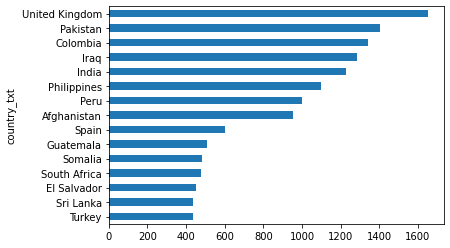

In [43]:
co=sns.color_palette("Spectral", as_cmap=True)
assassination.groupby("country_txt").size().sort_values(ascending=False).head(15).sort_values().plot(kind='barh')

### Conclusion: The five countries with the highest impact from terrorism as measured by the GTI are United Kingdom, Pakistan,Colombia,Iraq and India attack.

In [44]:
#Grouping the assination attack type based on region
assassination.groupby("region_txt").size().sort_values(ascending=False)

region_txt
South Asia                     4301
Middle East & North Africa     4206
Western Europe                 2938
South America                  2745
Sub-Saharan Africa             1638
Southeast Asia                 1369
Central America & Caribbean    1254
Eastern Europe                  400
North America                   255
Central Asia                    115
East Asia                        55
Australasia & Oceania            36
dtype: int64

<AxesSubplot:ylabel='region_txt'>

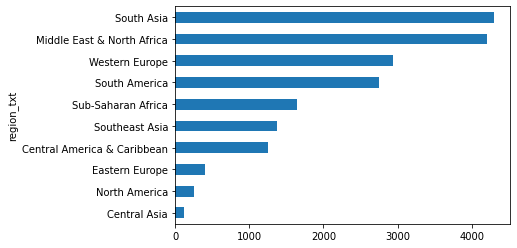

In [45]:
assassination.groupby("region_txt").size().sort_values(ascending=False).head(10).sort_values().plot(kind="barh")

### Conculsion : The ten most affected countries relative to the size of their economy are all conflict-affected states are the Middle East and North Africa, western europe and South Asia regions.

<AxesSubplot:ylabel='imonth'>

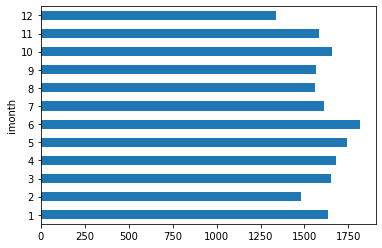

In [46]:
assassination.groupby("imonth").size().plot(kind="barh")

<AxesSubplot:xlabel='imonth', ylabel='count'>

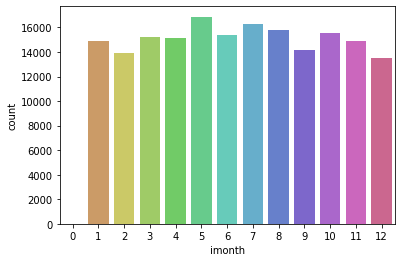

In [49]:
sns.countplot(x=data["imonth"],data=data,palette='hls')

### Conclusion: There are not much variations for the monthly attacks. But 5th and 7th month has highest number of attacks.

array([[<AxesSubplot:title={'center':'eventid'}>,
        <AxesSubplot:title={'center':'iyear'}>,
        <AxesSubplot:title={'center':'imonth'}>],
       [<AxesSubplot:title={'center':'iday'}>,
        <AxesSubplot:title={'center':'country'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:title={'center':'success'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

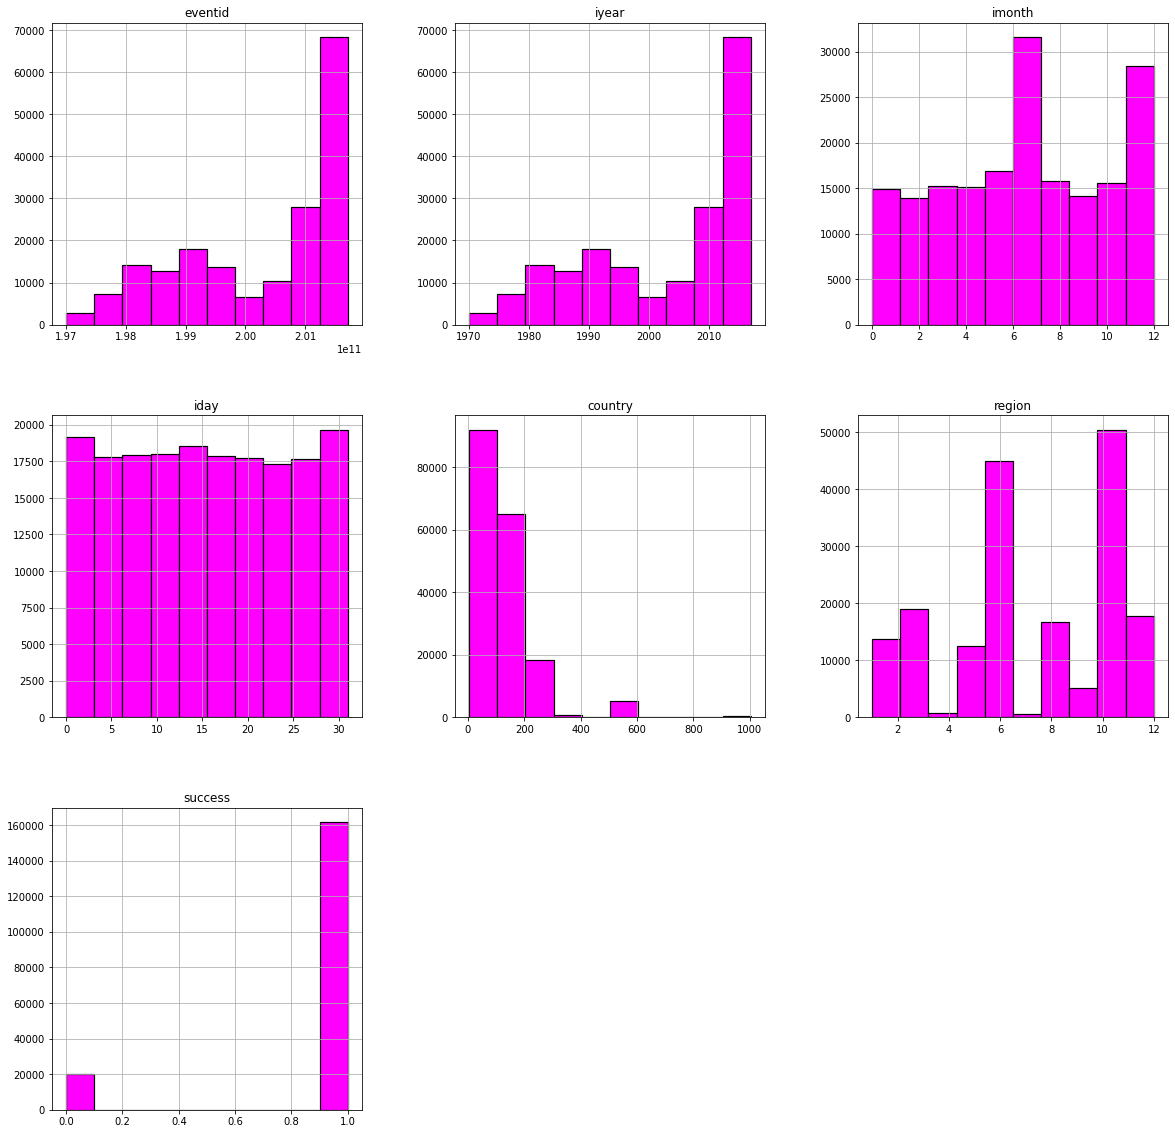

In [50]:
dataset.hist(color='magenta',edgecolor='black', linewidth=1.2, figsize=(20, 20))

### Conclusion: After 2010 attacks are increased.


In [51]:
data['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

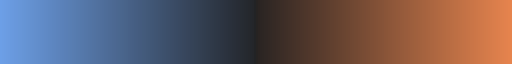

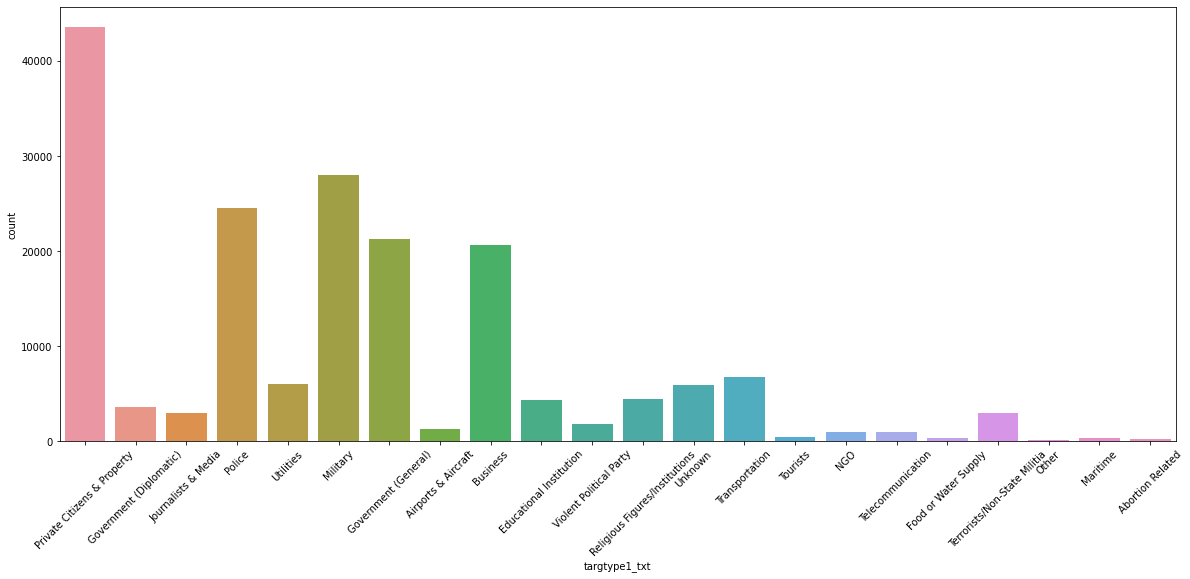

In [53]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=45)
sns.countplot(x=data['targtype1_txt'])
sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)


### Conclusion: Private citizens and property is the group facing the highest number of deaths from terrorist attacks.

In [54]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'location', 'success',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt'],
      dtype='object')

In [55]:
dataset['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
0                                                          10373
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
                                                           ...  
Multiple Telecommunication Targets                            31
Fire Fighter/Truck                                            27
Oil Tanker                                                    19
Personnel                                                     19
Internet Infrastructure                                       12
Name: targsubtype1_txt, Length: 113, dtype: int64

<AxesSubplot:xlabel='iyear', ylabel='count'>

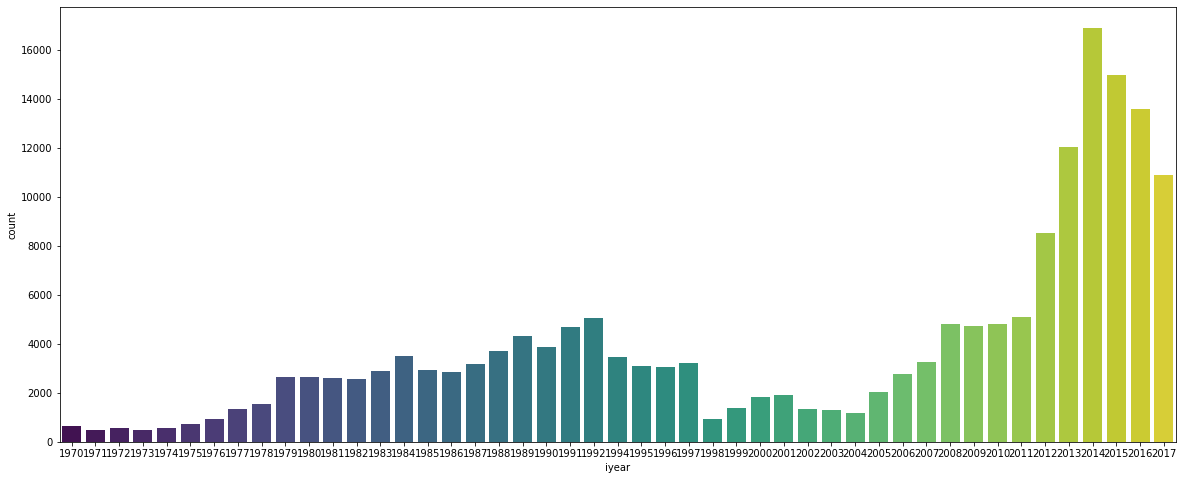

In [57]:
plt.figure(figsize=(20,8))
sns.countplot(x=data['iyear'],palette='viridis')

### Conclusion: Of the last 16 years, the worst year for terrorism was 2014.

In [58]:
month = dataset.groupby('targtype1_txt')['iyear'].value_counts(normalize=True)

In [59]:
month

targtype1_txt            iyear
Abortion Related         1984     0.102662
                         1995     0.091255
                         1992     0.068441
                         1994     0.068441
                         1997     0.064639
                                    ...   
Violent Political Party  1986     0.001608
                         1971     0.001072
                         2002     0.001072
                         1970     0.000536
                         1972     0.000536
Name: iyear, Length: 981, dtype: float64

c:\users\91932\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\91932\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


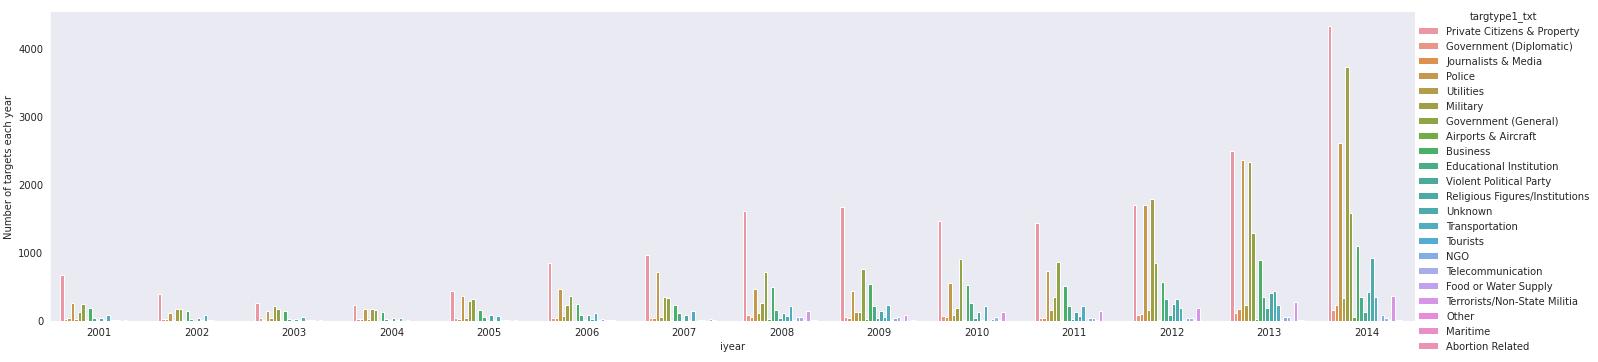

In [61]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=data, aspect=4.0, kind='count',
                       hue='targtype1_txt', order=range(2001, 2015))
    g.set_ylabels('Number of targets each year')

### Conclsion: Number of deaths are increasing year by year because of different targets. Where 2014 includes maximum targets and shows top most affected year.

c:\users\91932\appdata\local\programs\python\python38\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\91932\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


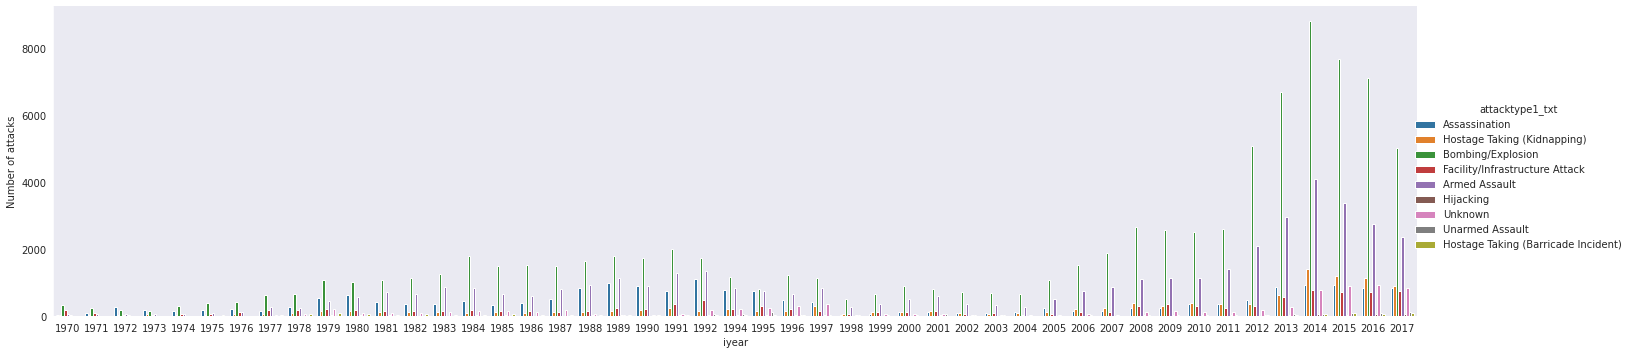

In [63]:
with sns.axes_style('dark'):
    g = sns.factorplot("iyear", data=data, aspect=4.0, kind='count',
                       hue='attacktype1_txt')
    g.set_ylabels('Number of attacks')

### Conclusion: Most of the attacks were by firearms with bombings and explosives making up a smaller percentage of terrorist attacks.

In [65]:
dataset.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country', 'country_txt',
       'region', 'region_txt', 'provstate', 'city', 'location', 'success',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt'],
      dtype='object')

In [66]:
matrix = dataset[['iyear','region']]
matrix.corr()

,iyear,region
iyear,1.000000,0.401384
region,0.401384,1.000000


In [67]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,0,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate


In [68]:
dataset['success'] = dataset['success'].replace(['Dhanora'],1)

In [69]:
dataset['location'] = dataset['location'].replace([13],'Dhanora')

In [70]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [71]:
dataset["success"]=lb.fit_transform(dataset["success"])

In [72]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,Mexico,1,North America,Federal,Mexico city,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,197001000001,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility
3,197001000002,1970,1,0,78,Greece,8,Western Europe,Attica,Athens,0,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate
4,197001000003,1970,1,0,101,Japan,4,East Asia,Fukouka,Fukouka,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate


In [73]:
dataset['country_txt']=lb.fit_transform(dataset['country_txt'])

In [74]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,location,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,197000000001,1970,7,2,58,47,2,Central America & Caribbean,0,Santo Domingo,0,1,Assassination,Private Citizens & Property,Named Civilian
1,197000000002,1970,0,0,130,116,1,North America,Federal,Mexico city,0,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Diplomatic Personnel (outside of embassy, cons..."
2,197001000001,1970,1,0,160,140,5,Southeast Asia,Tarlac,Unknown,0,1,Assassination,Journalists & Media,Radio Journalist/Staff/Facility
3,197001000002,1970,1,0,78,68,8,Western Europe,Attica,Athens,0,1,Bombing/Explosion,Government (Diplomatic),Embassy/Consulate
4,197001000003,1970,1,0,101,90,4,East Asia,Fukouka,Fukouka,0,1,Facility/Infrastructure Attack,Government (Diplomatic),Embassy/Consulate


In [75]:
dataset.drop(['region_txt', 'provstate', 'city', 'location','attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt'],axis=1,inplace=True)

In [76]:
dataset.head()

,eventid,iyear,imonth,iday,country,country_txt,region,success
0,197000000001,1970,7,2,58,47,2,1
1,197000000002,1970,0,0,130,116,1,1
2,197001000001,1970,1,0,160,140,5,1
3,197001000002,1970,1,0,78,68,8,1
4,197001000003,1970,1,0,101,90,4,1


<AxesSubplot:xlabel='iday', ylabel='count'>

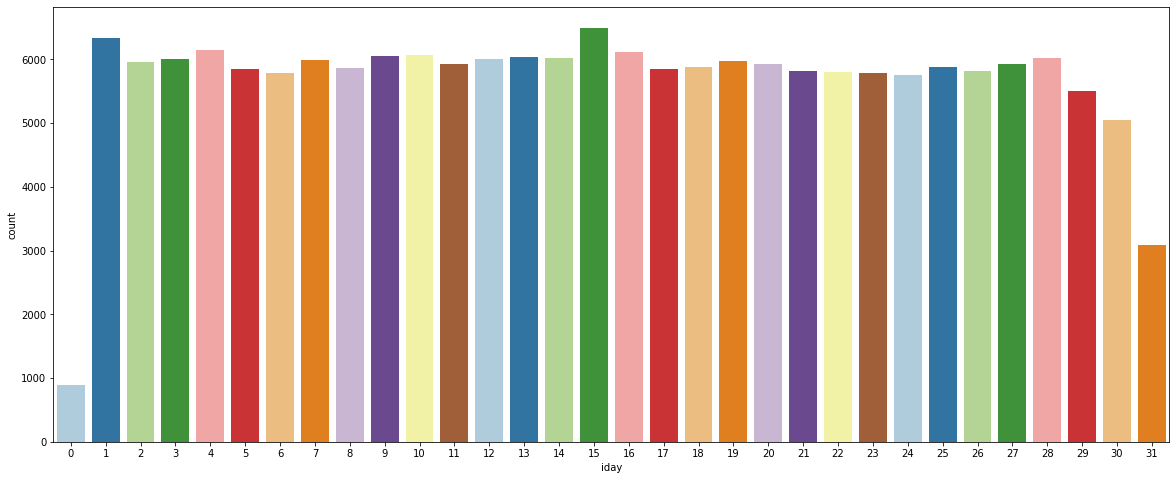

In [78]:
plt.figure(figsize=(20,8))
sns.countplot(x='iday',data=data,palette='Paired')

### Model Building

In [79]:
X = dataset.drop('success',axis=1)
y = dataset['success']

In [80]:
X.head()

,eventid,iyear,imonth,iday,country,country_txt,region
0,197000000001,1970,7,2,58,47,2
1,197000000002,1970,0,0,130,116,1
2,197001000001,1970,1,0,160,140,5
3,197001000002,1970,1,0,78,68,8
4,197001000003,1970,1,0,101,90,4


In [81]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: success, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [84]:
X_train.shape

(145352, 7)

In [85]:
X_test.shape


(36339, 7)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
model=LogisticRegression()

In [89]:
model.fit(X_train,y_train)

LogisticRegression()

In [90]:
y_pred=model.predict(X_test)

In [91]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(y_test,y_pred)*100

89.24571397121551

In [94]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)


In [95]:
cross_val_logistic=cross_val_score(model,X,y,cv=k_fold,scoring='accuracy')

In [96]:
cross_val_logistic


array([0.88824679, 0.8878034 , 0.89094061, 0.88890418, 0.89209643])

In [97]:
cross_val_logistic.mean()*100

88.95982814310793